
#Introduction
**In the contemporary lending industry, the efficient and accurate approval of loans is a pivotal
challenge. Financial institutions are tasked with the responsibility of making loan approval
decisions while simultaneously managing credit risk, ensuring equitable lending practices,
and facilitating timely access to credit for eligible borrowers. The primary objective of this
project is to develop a robust and dependable loan approval model using logistic regression.
This model is designed to effectively differentiate between loan applicants who are likely to
default and those who are likely to repay their loans, with the ultimate goal of streamlining
and optimizing the loan approval process.**

# Import the required Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load the Data Set

In [15]:
df = pd.read_csv('/content/drive/MyDrive/loan.csv', skipinitialspace=True)

#Define the Problem:

Clearly articulate the problem you are trying to solve or the question you want to answer.
Understand the business context and objectives.
#Collect Data:

Identify and gather relevant data sources.
Ensure data quality and handle missing or erroneous data.
#Explore and Understand the Data:

Perform exploratory data analysis (EDA) to understand the structure, patterns, and relationships in the data.
Visualize data using charts and graphs.
Check for outliers and anomalies.
#Preprocess and Clean the Data:

Handle missing values, outliers, and duplicates.
Convert data types if necessary.
Normalize or scale features.
Encode categorical variables.

#Model Selection:

Choose a suitable machine learning or statistical model based on the problem type (classification, regression, clustering, etc.).
Consider the characteristics of the data and the problem.
Train the Model:

Use the training data to train the selected model.
Adjust model parameters to optimize performance.
#Evaluate Model Performance:

Use the testing set to evaluate the model's performance.
Metrics depend on the type of problem (accuracy, precision, recall, F1 score, etc.).

#**Exploratory Data Analysis**

In [16]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [18]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [19]:
print(df['loan_status'].unique())
print(df['education'].unique())
print(df['self_employed'].unique())

['Approved' 'Rejected']
['Graduate' 'Not Graduate']
['No' 'Yes']


# let's perform the visualizations and make decisions on feature selection. The goal is to use visualizations to gain insights into the relationships between features and the target variable. Based on these insights, you can make informed decisions about which features to include in your model.

In [51]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

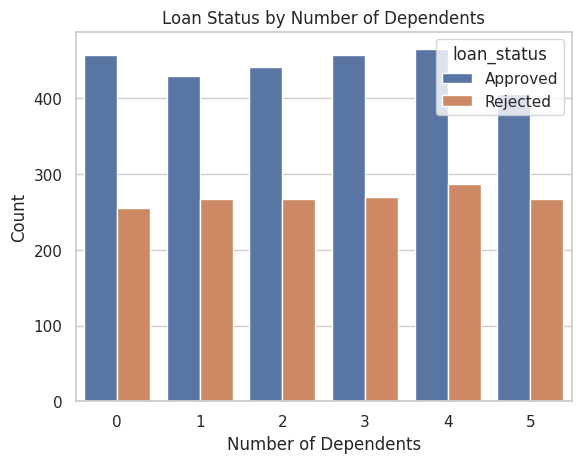

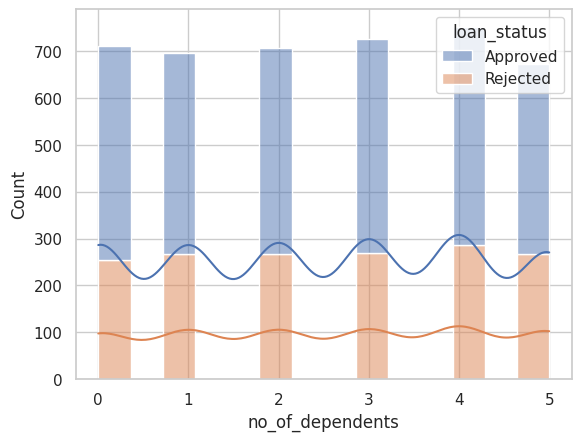

In [57]:

sns.countplot(x="no_of_dependents", hue="loan_status", data=df)

# Add labels and title
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Loan Status by Number of Dependents")

# Show the plot
plt.show()
sns.histplot(data=df, x="no_of_dependents", hue="loan_status", kde=True, multiple="stack")
plt.show()

Text(0.5, 1.0, 'Loan Amount by Annual Income with Loan Status')

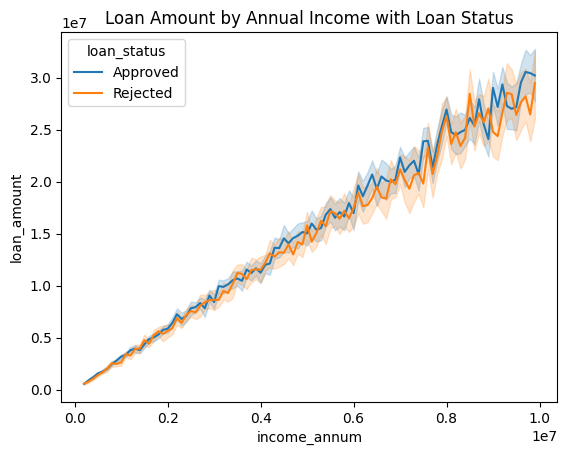

In [22]:
sns.lineplot(x='income_annum', y='loan_amount', hue='loan_status', data=df)
plt.title('Loan Amount by Annual Income with Loan Status')

<Axes: xlabel='cibil_score', ylabel='Count'>

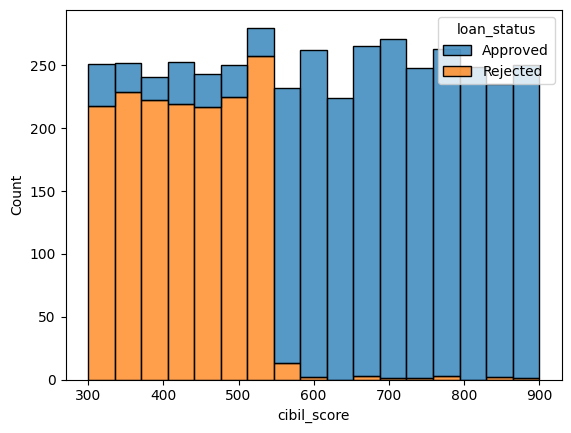

In [ ]:
 sns.histplot(x=df['cibil_score'], hue=df['loan_status'], multiple="stack")

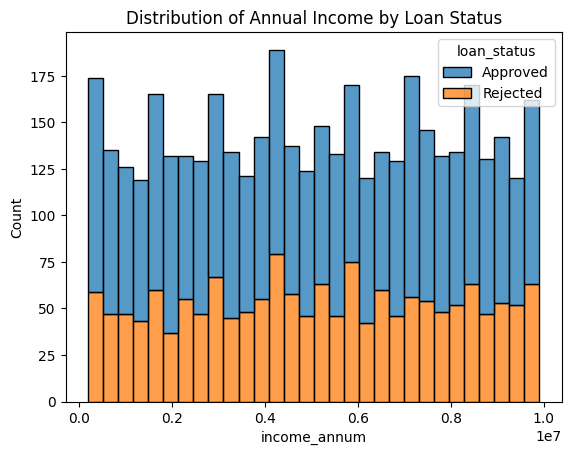

In [23]:
sns.histplot(data=df, x='income_annum', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribution of Annual Income by Loan Status')
plt.show()

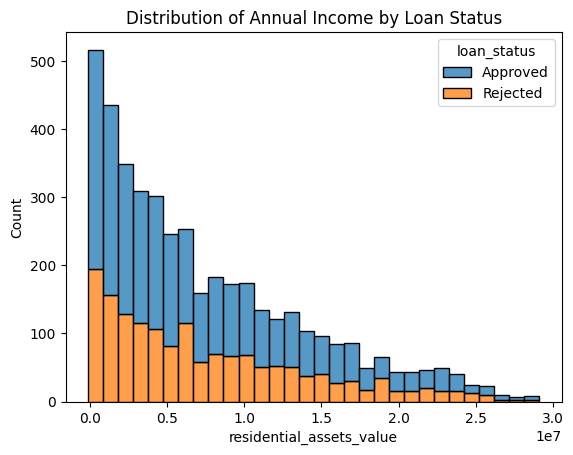

In [29]:
sns.histplot(data=df, x='residential_assets_value', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribution of Annual Income by Loan Status')
plt.show()


# Convert categorical variables to dummy/indicator variables

In the initial stages of the project, an extensive Exploratory Data Analysis (EDA) was conducted to unravel insights into the dataset. The primary objective was to identify meaningful patterns, relationships, and potential features that could contribute to the logistic regression model's predictive capabilities. Despite rigorous exploration and testing various feature selection techniques, the dataset did not exhibit clear and distinctive patterns that could confidently guide the exclusion of specific features.

Acknowledging the complexity and uniqueness of the dataset, it was decided, as a conscious choice, to include all available features in the logistic regression model.

In [32]:
X = df[['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
        'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]
y = df['loan_status']

# Print column names in X to inspect
print("\nSelected Features (X) Column Names:")
print(X.columns)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['education', 'self_employed'], drop_first=True)

# Print column names after one-hot encoding to inspect
print("\nColumn Names After One-Hot Encoding:")
print(X.columns)
X.head()


Selected Features (X) Column Names:
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

Column Names After One-Hot Encoding:
Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate',
       'self_employed_Yes'],
      dtype='object')


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


#**Logistic Regression Model**

In our mini project, the choice of logistic regression as the classification algorithm was driven by several considerations aligned with the nature of our data and the objectives of the project. The following factors contributed to the selection of logistic regression:

### Binary Classification Nature:

Logistic regression is particularly well-suited for binary classification tasks, where the outcome variable has two classes. In our project, we are dealing with a binary classification problem, making logistic regression a natural and appropriate choice.
### Interpretability:

Logistic regression provides interpretable results. The coefficients in the model can be directly interpreted in terms of the log-odds of the outcome. This interpretability is crucial, especially when we seek to understand the impact of individual features on the likelihood of a particular outcome.




In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.9052

Confusion Matrix:
[[498  38]
 [ 43 275]]

Classification Report:
              precision    recall  f1-score   support

    Approved       0.92      0.93      0.92       536
    Rejected       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [45]:
print(y_pred[0])

Rejected


# **Model Deployment:**

For the deployment phase of our loan approval model, we have chosen Tkinter as the GUI framework. Several factors influenced this decision, aligning with the nature of our project and the objectives we aim to achieve:

### 1. **Ease of Integration with Python:**
   Tkinter is a standard GUI toolkit that comes bundled with Python, making it readily available without the need for additional installations. This seamless integration with Python allows us to create a user-friendly interface for our loan approval model effortlessly.

### 2. **Simplicity and Intuitiveness:**
   Tkinter is known for its simplicity and ease of use, making it an excellent choice for developing straightforward GUI applications. Our goal is to create an intuitive interface that allows users to interact with the loan approval model without unnecessary complexities.

### 3. **Rapid Development:**
   Tkinter facilitates rapid development of GUI applications. Its simplicity, combined with a vast array of built-in widgets, accelerates the development process. This is particularly advantageous when creating a prototype or a minimum viable product (MVP) for demonstration purposes.